# Визуализация китайского датасета

In [1]:
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

In [3]:
def save_obj(obj, name):
    os.makedirs("obj/Test", exist_ok=True)
    with open('obj/Test/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/Test/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
dataset = pd.read_csv('../datasets/chinese_new.csv', sep=',')
dataset

index  Qrst_dur  P_Q_duration  Q_T_duration  T_duration  P_duration  \
0          0  0.076632           NaN      0.279263    0.123100         NaN   
1          1  0.107158           NaN      0.298000    0.112200         NaN   
2          2  0.082800           NaN      0.284947    0.108200         NaN   
3          3  0.081500           NaN      0.314706    0.142556         NaN   
4          4  0.075053           NaN      0.268421    0.084762         NaN   
...      ...       ...           ...           ...         ...         ...   
23995  23995  0.104125           0.0      0.376000    0.153500    0.071875   
23996  23996  0.100500           0.0      0.413750    0.193625    0.080750   
23997  23997  0.094750           0.0      0.420625    0.190500    0.087500   
23998  23998  0.091500           0.0      0.416125    0.178625    0.093750   
23999  23999  0.086625           0.0      0.415625    0.177250    0.099625   

       Heart_rate  f_label  sex  age        QRSA       Q_av         R_av  \
0      171.184023        5    0   74 -596.758874   3.616371  1864.425542   
1      187.826087        1    0   74 -790.003412   5.422741  1844.263848   
2      186.244078        2    0   74 -230.210919  10.927699  1840.033096   
3      185.546875        2    0   74  685.091725   3.258911  1846.318812   
4      170.239596        7    0   74 -214.589496   3.348546  1880.346540   
...           ...      ...  ...  ...         ...        ...          ...   
23995   75.942958        0    1   61   31.864414   4.296980  2247.126398   
23996   75.598488        0    1   61  -34.948739   4.186152  2250.085698   
23997   75.062552        0    1   61  -98.447443   5.704861  2250.611111   
23998   74.775673        0    1   61 -111.225219   5.864009  2255.627784   
23999   74.300338        0    1   61  -99.083990   5.573171  2255.590854   

              S_av  
0      1860.809172  
1      1838.841108  
2      1829.105397  
3      1843.059901  
4      1876.997994  
...            ...  
23995  2242.829418  
23996  2245.899546  
23997  2244.906250  
23998  2249.763775  
23999  2250.017683  

[24000 rows x 14 columns]

In [5]:
for col in dataset:
    print(f'{col}: {dataset[col].isna().sum()} NaN vals')

index: 0 NaN vals
Qrst_dur: 8 NaN vals
P_Q_duration: 3103 NaN vals
Q_T_duration: 14 NaN vals
T_duration: 13 NaN vals
P_duration: 3082 NaN vals
Heart_rate: 10 NaN vals
f_label: 0 NaN vals
sex: 0 NaN vals
age: 0 NaN vals
QRSA: 0 NaN vals
Q_av: 8 NaN vals
R_av: 8 NaN vals
S_av: 8 NaN vals


In [6]:
quantify_nans(dataset)

Missing values 6254 (2.0044871794871795%)
Number of complete rows: 19325 (80.52083333333333%)


In [7]:
dataset['f_label'].value_counts()

0    17123
5     1695
2     1098
1      918
8      826
3      704
7      653
6      574
4      207
9      202
Name: f_label, dtype: int64

In [8]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [9]:
dataset_unhealthy = dataset.drop(dataset[(dataset['f_label'] == 0)].index).reset_index(drop=True)
dataset_raw = dataset.drop(['f_label'], axis=1)
dataset_raw_unhealthy = dataset_unhealthy.drop(['f_label'], axis=1)
dataset_unhealthy

index  Qrst_dur  P_Q_duration  Q_T_duration  T_duration  P_duration  \
0      2764  0.083750      0.156500      0.412750    0.142889    0.081000   
1      2571  0.085600      0.137000      0.381000    0.165273    0.084000   
2      3719  0.087000      0.218609      0.379500    0.211333    0.092500   
3      1654  0.080462      0.118000      0.371846    0.191077    0.078167   
4      3553  0.095000      0.165500      0.373750    0.151250    0.111714   
...     ...       ...           ...           ...         ...         ...   
6872    586  0.136500      0.190000      0.458250    0.166750    0.087556   
6873   4153  0.077385      0.110769      0.370833    0.189667    0.095538   
6874   1276  0.112889      0.176889      0.379111    0.190600    0.071333   
6875   5732  0.086100      0.146105      0.365789    0.151158    0.098000   
6876    568  0.073667      0.127500      0.332833    0.143333    0.086000   

      Heart_rate  f_label  sex  age         QRSA      Q_av         R_av  \
0      58.947368        5    0   65   304.914787  3.413430  1795.818535   
1      85.092972        6    0   63   -23.267647  8.262295  1271.559016   
2      79.489341        6    1   50  1702.201089  6.034991  1802.281768   
3      81.163341        1    0   50  -130.921387  4.819600  1572.988140   
4      63.424947        5    1   35   137.906359  3.442365  1992.098054   
...          ...      ...  ...  ...          ...       ...          ...   
6872   71.672355        8    1   85   327.672345  3.177388  1306.971735   
6873  102.915952        1    0   63    54.052116  3.423326  1220.476242   
6874   77.444337        3    1   26    -2.089455  6.933761  1344.930556   
6875   86.764594        5    1   91  -167.898173  5.106574  1307.379482   
6876   81.632653        1    1   54   -11.199379  4.046455  1532.422983   

             S_av  
0     1792.405105  
1     1263.296721  
2     1796.246777  
3     1568.168539  
4     1988.655689  
...           ...  
6872  1303.794347  
6873  1217.052916  
6874  1337.996795  
6875  1302.272908  
6876  1528.376528  

[6877 rows x 14 columns]

In [10]:
dataset_raw

index  Qrst_dur  P_Q_duration  Q_T_duration  T_duration  P_duration  \
0      11598  0.121579           NaN      0.399333    0.095714         NaN   
1       2764  0.083750      0.156500      0.412750    0.142889    0.081000   
2       2571  0.085600      0.137000      0.381000    0.165273    0.084000   
3       3719  0.087000      0.218609      0.379500    0.211333    0.092500   
4       1654  0.080462      0.118000      0.371846    0.191077    0.078167   
...      ...       ...           ...           ...         ...         ...   
23995  12118  0.092364      0.164727      0.354000    0.174545    0.109778   
23996  12679  0.152000      0.089000      0.434000    0.212000         NaN   
23997  17502  0.092000      0.152889      0.374222    0.170600    0.069556   
23998  13994  0.080308      0.199500      0.385667    0.132333    0.092667   
23999  16077  0.130000      0.152769      0.418143    0.188533    0.076000   

       Heart_rate  sex  age         QRSA       Q_av         R_av         S_av  
0      140.661631    0   47  -543.630691   5.700256  2505.858241  2500.157985  
1       58.947368    0   65   304.914787   3.413430  1795.818535  1792.405105  
2       85.092972    0   63   -23.267647   8.262295  1271.559016  1263.296721  
3       79.489341    1   50  1702.201089   6.034991  1802.281768  1796.246777  
4       81.163341    0   50  -130.921387   4.819600  1572.988140  1568.168539  
...           ...  ...  ...          ...        ...          ...          ...  
23995   91.296409    1   55  2139.133296   3.554617  3319.505432  3315.950815  
23996   97.039064    0   54  1743.036747   7.502402  1572.181556  1564.679155  
23997   76.800000    0   59  -323.274337   6.194030  1235.531983  1229.337953  
23998  101.522843    0   68   -51.643068  11.526490  1510.079470  1498.552980  
23999   73.598792    0   89 -2491.090875   5.609806  5094.640759  5089.030953  

[24000 rows x 13 columns]

In [11]:
dataset_raw_unhealthy

index  Qrst_dur  P_Q_duration  Q_T_duration  T_duration  P_duration  \
0      2764  0.083750      0.156500      0.412750    0.142889    0.081000   
1      2571  0.085600      0.137000      0.381000    0.165273    0.084000   
2      3719  0.087000      0.218609      0.379500    0.211333    0.092500   
3      1654  0.080462      0.118000      0.371846    0.191077    0.078167   
4      3553  0.095000      0.165500      0.373750    0.151250    0.111714   
...     ...       ...           ...           ...         ...         ...   
6872    586  0.136500      0.190000      0.458250    0.166750    0.087556   
6873   4153  0.077385      0.110769      0.370833    0.189667    0.095538   
6874   1276  0.112889      0.176889      0.379111    0.190600    0.071333   
6875   5732  0.086100      0.146105      0.365789    0.151158    0.098000   
6876    568  0.073667      0.127500      0.332833    0.143333    0.086000   

      Heart_rate  sex  age         QRSA      Q_av         R_av         S_av  
0      58.947368    0   65   304.914787  3.413430  1795.818535  1792.405105  
1      85.092972    0   63   -23.267647  8.262295  1271.559016  1263.296721  
2      79.489341    1   50  1702.201089  6.034991  1802.281768  1796.246777  
3      81.163341    0   50  -130.921387  4.819600  1572.988140  1568.168539  
4      63.424947    1   35   137.906359  3.442365  1992.098054  1988.655689  
...          ...  ...  ...          ...       ...          ...          ...  
6872   71.672355    1   85   327.672345  3.177388  1306.971735  1303.794347  
6873  102.915952    0   63    54.052116  3.423326  1220.476242  1217.052916  
6874   77.444337    1   26    -2.089455  6.933761  1344.930556  1337.996795  
6875   86.764594    1   91  -167.898173  5.106574  1307.379482  1302.272908  
6876   81.632653    1   54   -11.199379  4.046455  1532.422983  1528.376528  

[6877 rows x 13 columns]

In [12]:
dataset_dropped = dataset.drop('index', axis=1)
dataset_unhealthy = dataset_unhealthy.drop('index', axis=1)
dataset_raw = dataset_raw.drop('index', axis=1)
dataset_raw_unhealthy = dataset_raw_unhealthy.drop('index', axis=1)

## План

Построим кучу деревьев на основе:
1. Масштабирования: нормализации, стандартизации, оптимизации (если это так можно назвать),
2. 2D/3D.

## 1. Обработка датасета

### Нормализация и стандартизация

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

datasets = [dataset_dropped, dataset_unhealthy, dataset_raw, dataset_raw_unhealthy]
X_data_prep = [num_pipeline.fit_transform(X_data_raw) for X_data_raw in datasets]
X_prep = [pd.DataFrame(X) for X in X_data_prep]

## 2. Построение деревьев

In [14]:
import elpigraph
from elpigraph import computeElasticPrincipalTree

nnodes = 50
X_norm = [X.to_numpy() for X in X_prep]

In [15]:
def do_PCA(X, dim):
    #reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:, 0:dim], v, mean_val 

pack = [do_PCA(X) for X in X_norm]

X_pca_norm = [pack[i][0] for i in range(len(pack))]
components_norm = [pack[i][1] for i in range(len(pack))]
mnval_norm = [pack[i][2] for i in range(len(pack))]

In [67]:
def create_extended_tree(X, nnodes):
    tree_elpi = computeElasticPrincipalTree(X, nnodes, alpha=0.01, Mu=0.1, Lambda=0.05, FinalEnergy='Penalized')[0]
    prune_the_tree(tree_elpi)
    tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
    return tree_extended
'''
Chinese_tree_norm = [create_extended_tree(X, 50) for X in X_pca_norm]
'''

'\nChinese_tree_norm = [create_extended_tree(X, 50) for X in X_pca_norm]\n'

In [17]:
'''
save_obj(Chinese_tree_norm, "Chinese_tree_norm")
'''

'\nsave_obj(Chinese_tree_norm, "Chinese_tree_norm")\n'

In [18]:
Chinese_tree_norm = load_obj("Chinese_tree_norm")

In [19]:
variable_names = [[str(s) for s in data.columns[:]] for data in datasets]
datasets_orig = [pd.DataFrame(SimpleImputer(strategy="median").fit_transform(data), 
                              columns=var_names) for data, var_names in zip(datasets, variable_names)]

datasets_orig[0]['f_label'] = dataset['f_label']
datasets_orig[1]['f_label'] = dataset_unhealthy['f_label']
datasets_orig[2]['f_label'] = dataset['f_label']
datasets_orig[3]['f_label'] = dataset_unhealthy['f_label']
variable_names = [[str(s) for s in data.columns[:]] for data in datasets_orig]
datasets_orig = [data.to_numpy() for data in datasets_orig]

## 3. Визуализация деревьев

### Окраска ветвей деревьев

In [20]:
def tree_visualization(tree_elpi, X, X_orig, components_vec, mean_val):
    vec_labels_by_branches = partition_data_by_tree_branches(X, tree_elpi)

    partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = tree_elpi['NodePositions'], 
                                                        SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                        MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                        )
    partition_by_node = np.zeros(len(partition))
    for i,p in enumerate(partition):
        partition_by_node[i] = p[0]

    variable_names = [str(s) for s in dataset.columns[1:]]
    visualize_eltree_with_data(tree_elpi, X, X_orig, components_vec, mean_val, 'k', variable_names,
                              Color_by_partitioning = True, visualize_partition = vec_labels_by_branches)

In [21]:
figsize=(15, 12)

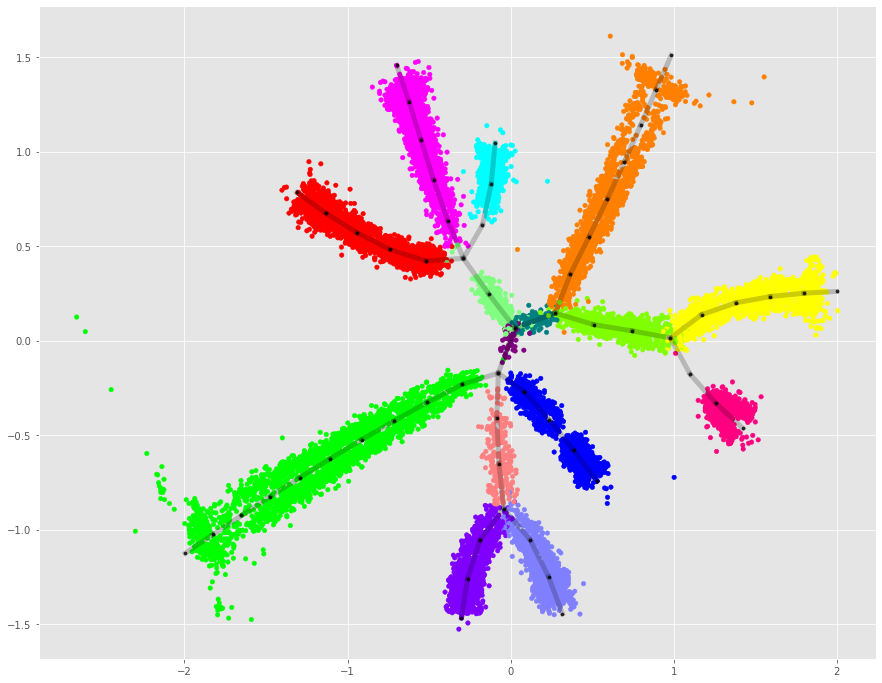

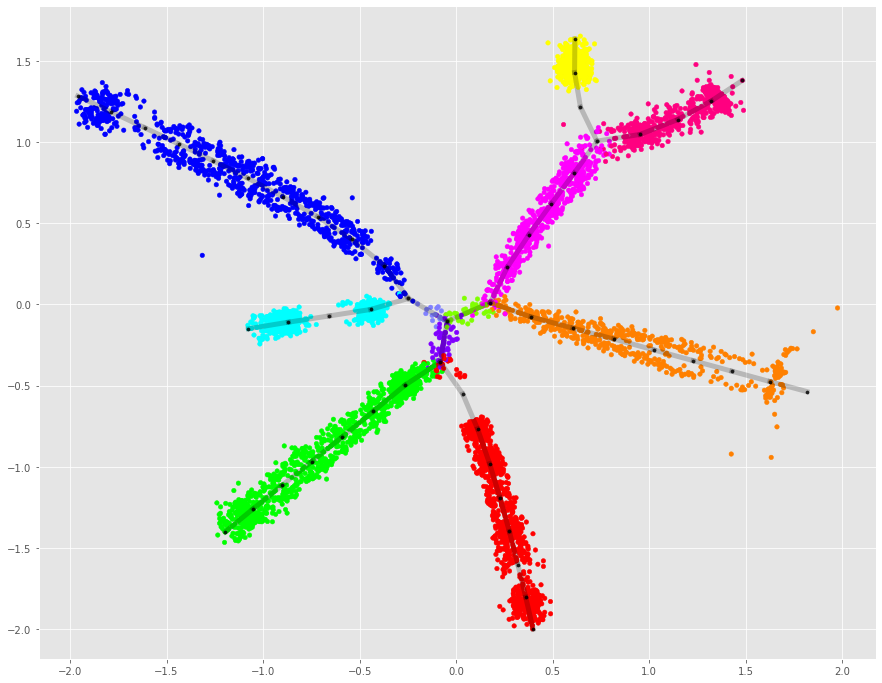

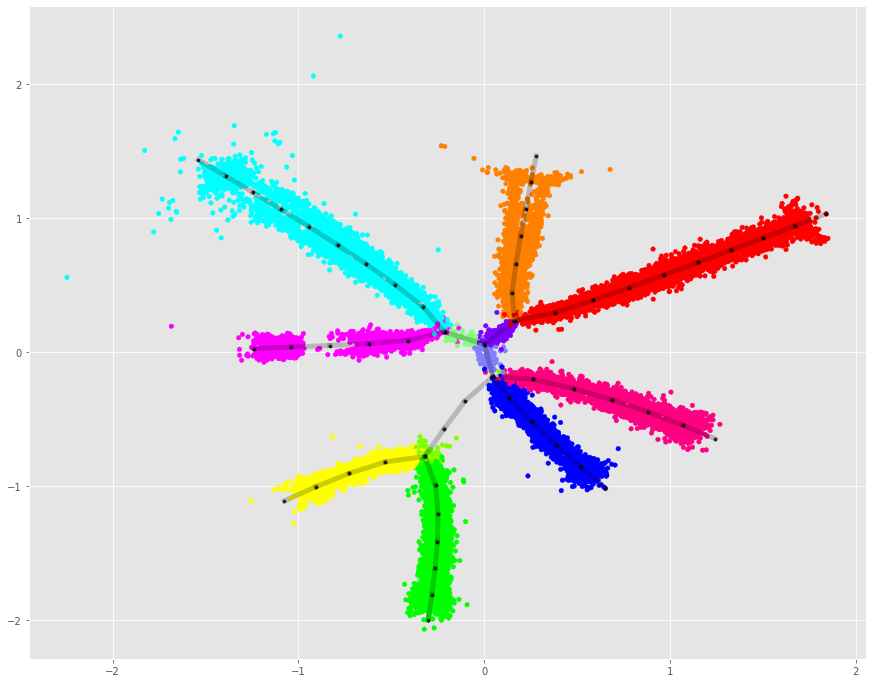

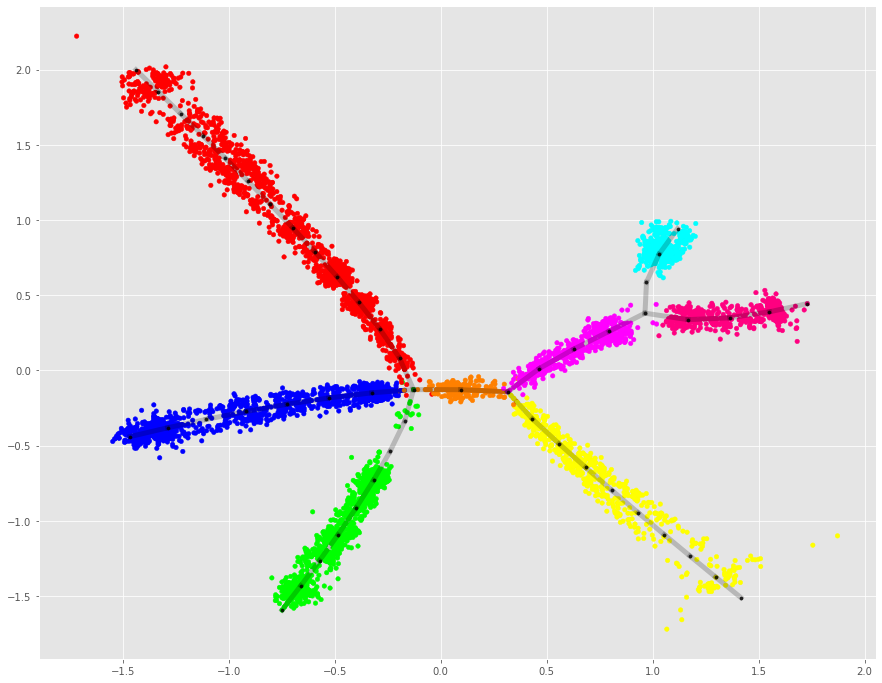

In [22]:
for tree, X_pca, data_orig, components, mnval in zip(Chinese_tree_norm, X_pca_norm, datasets_orig, components_norm, mnval_norm):
    fig = plt.figure(figsize=figsize)
    tree_visualization(tree, X_pca, data_orig, components, mnval)
    plt.show()

### Визуализация атрибутов и исследование деревьев

#### Нормализация

In [23]:
data_names = ['все пациенты, дерево построено с использованием итоговых классов.', 
              'больные пациенты, дерево построено с использованием итоговых классов.', 
              'все пациенты, дерево построено без использования итоговых классов.', 
              'больные пациенты, дерево построено без использования итоговых классов.']

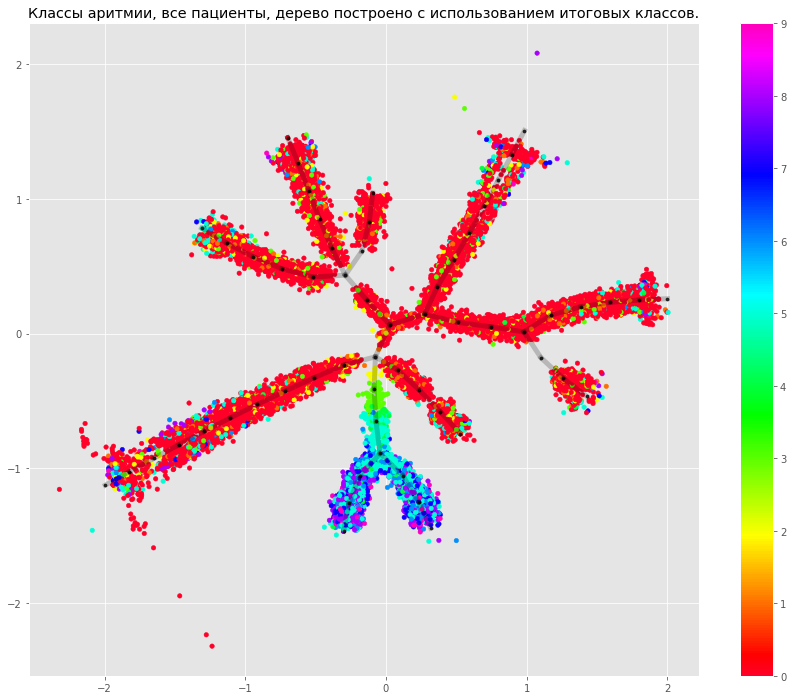

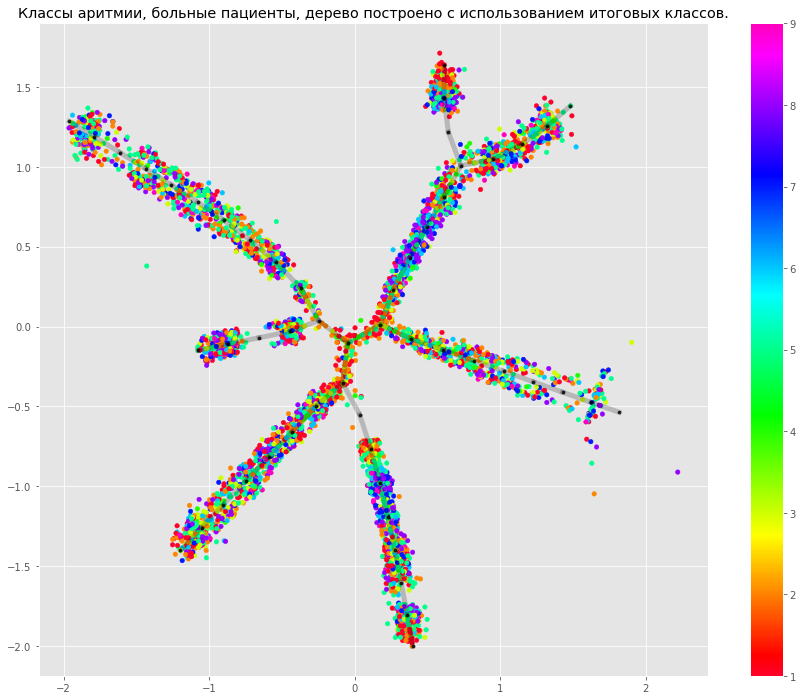

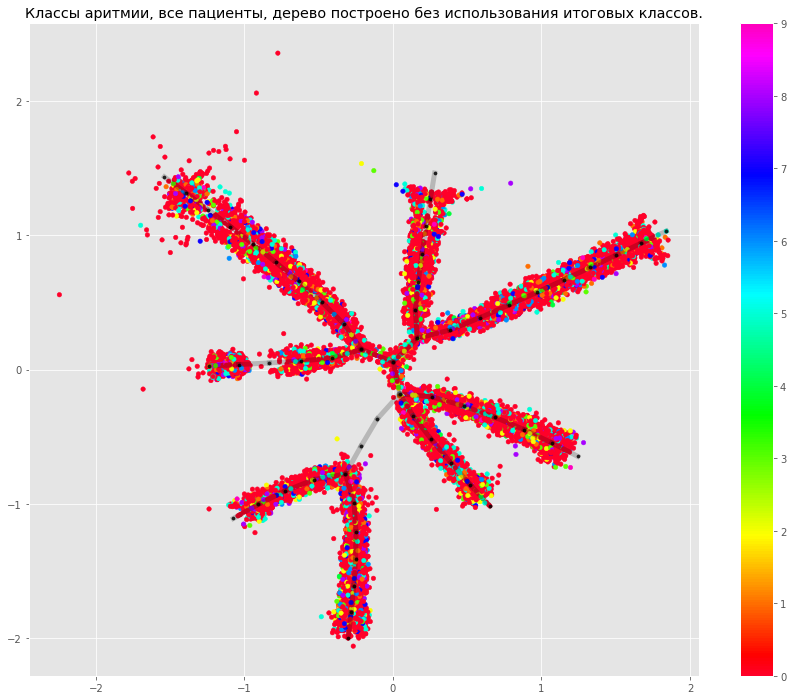

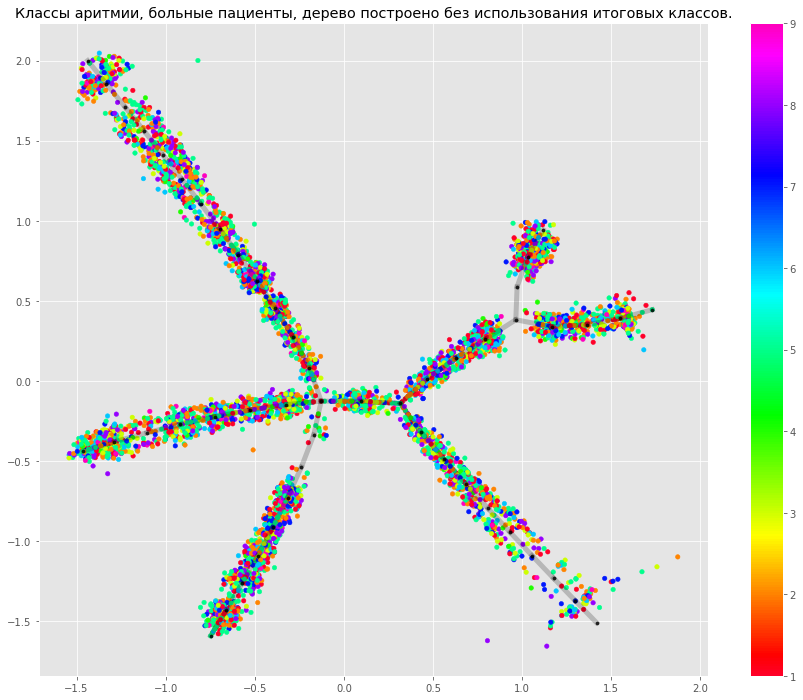

In [24]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(Chinese_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='f_label', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Классы аритмии, " + data_name)
    plt.show()

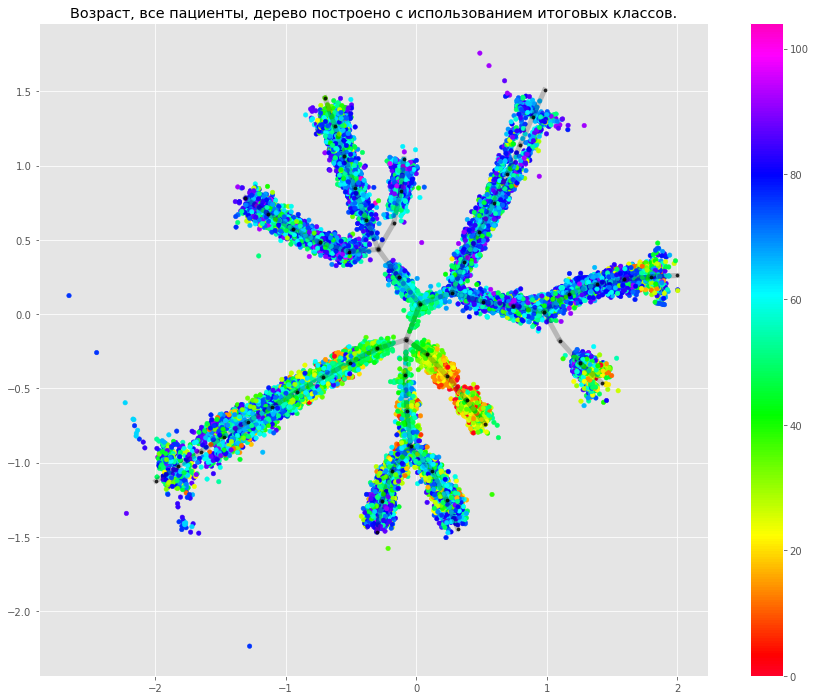

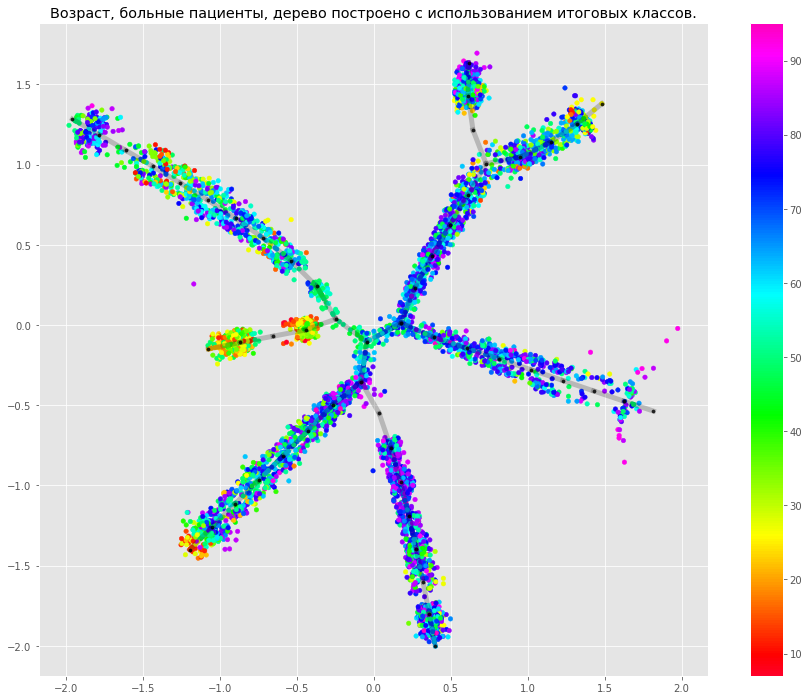

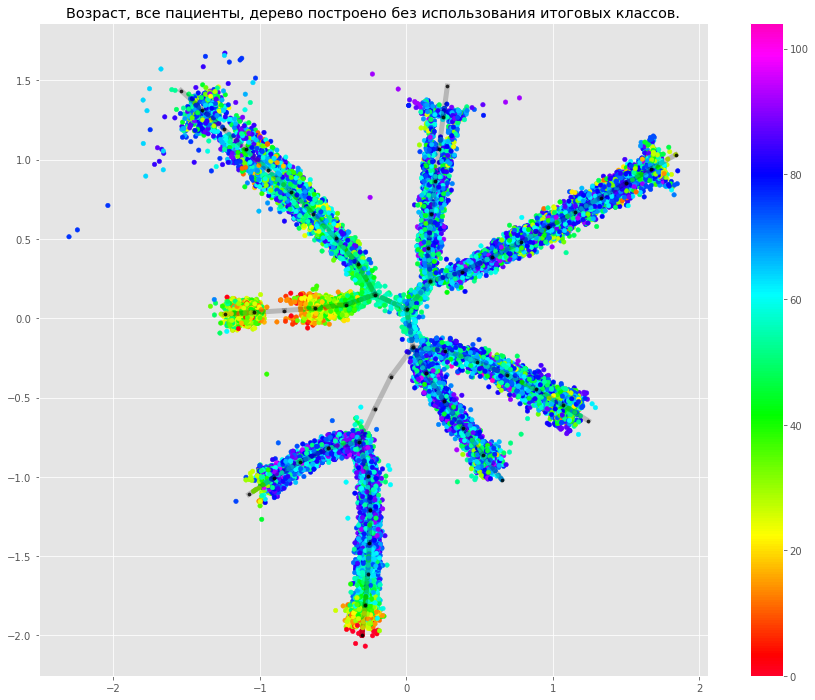

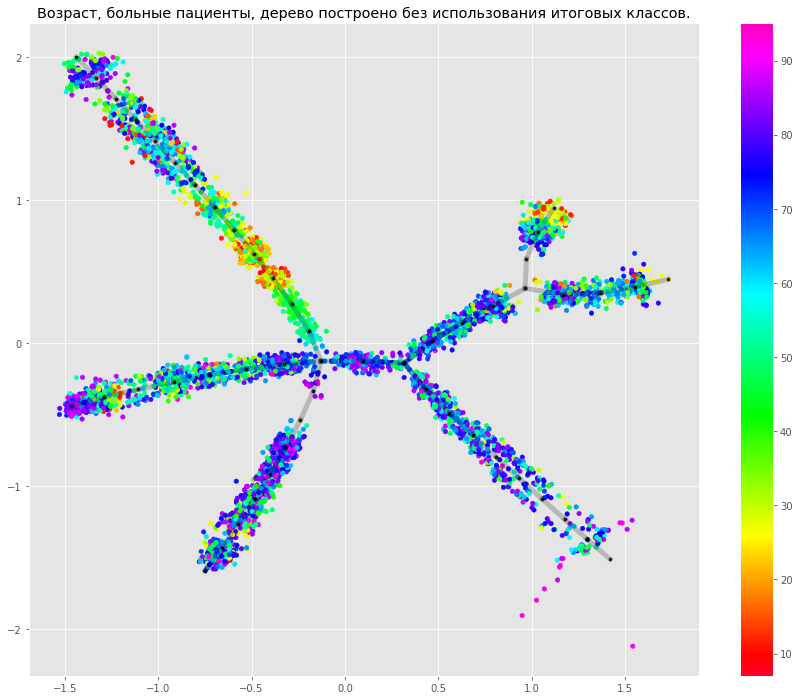

In [25]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(Chinese_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='age', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Возраст, " + data_name)
    plt.show()

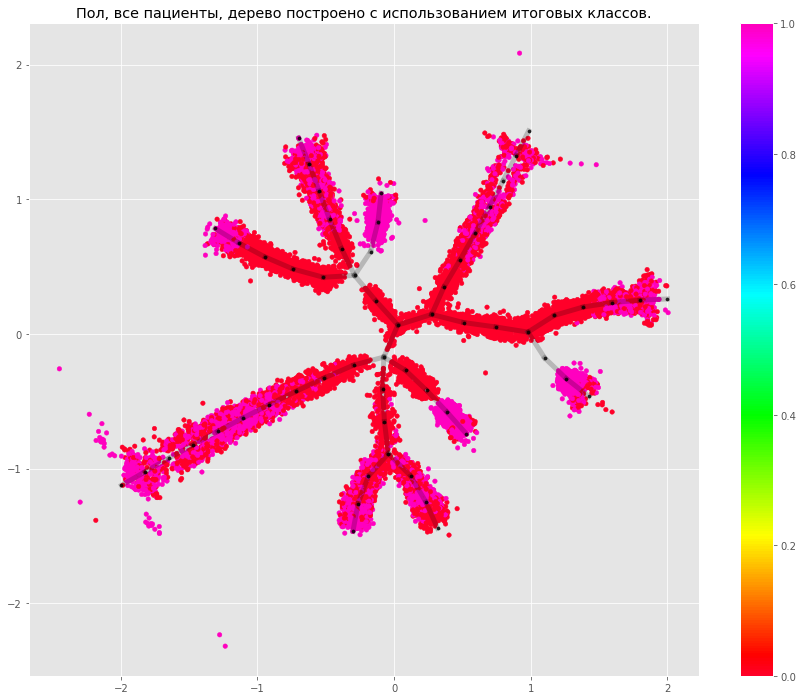

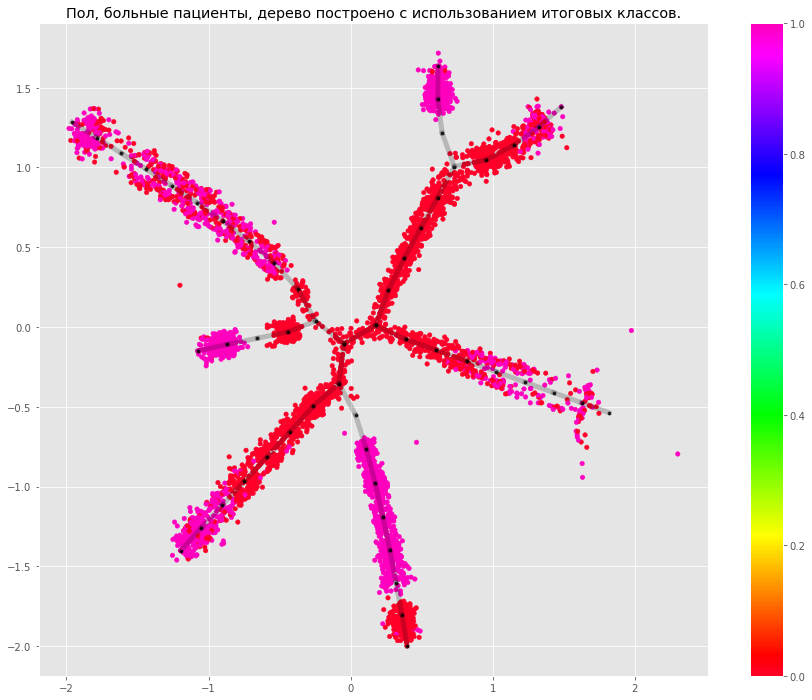

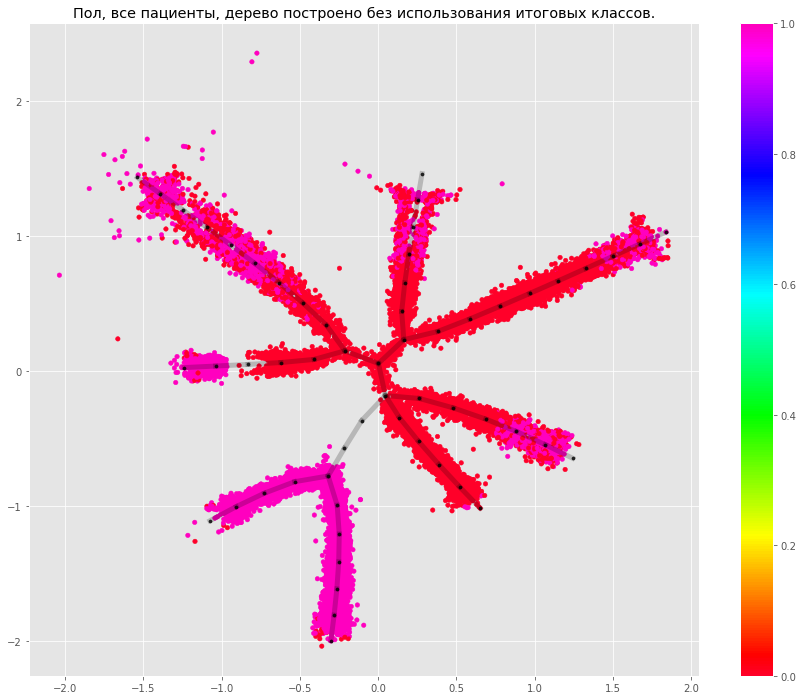

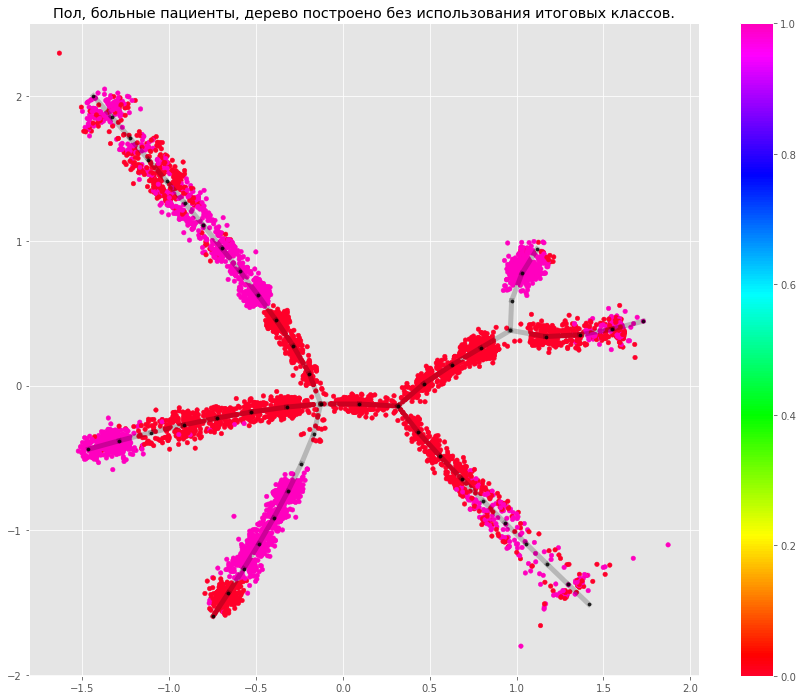

In [26]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(Chinese_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='sex', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Пол, " + data_name)
    plt.show()

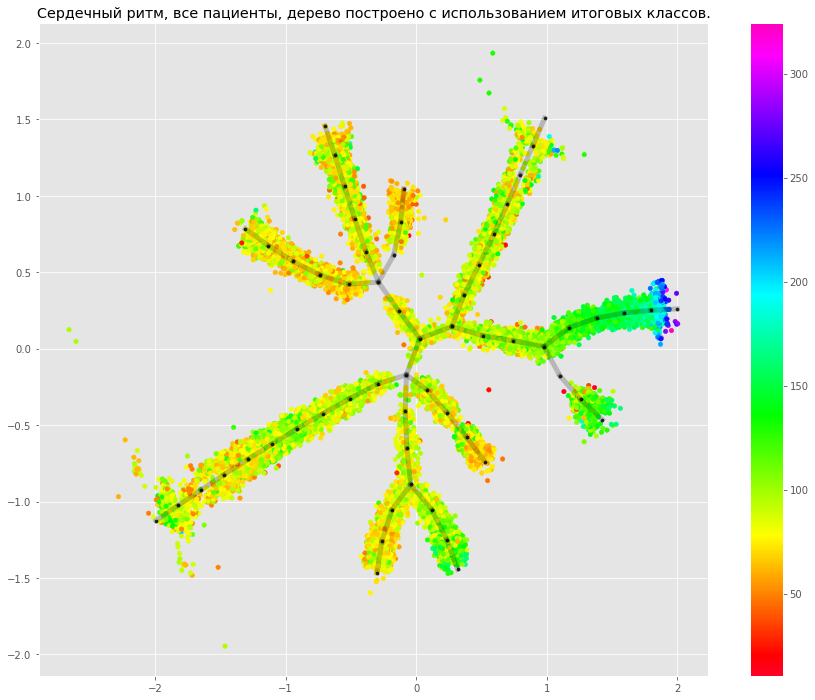

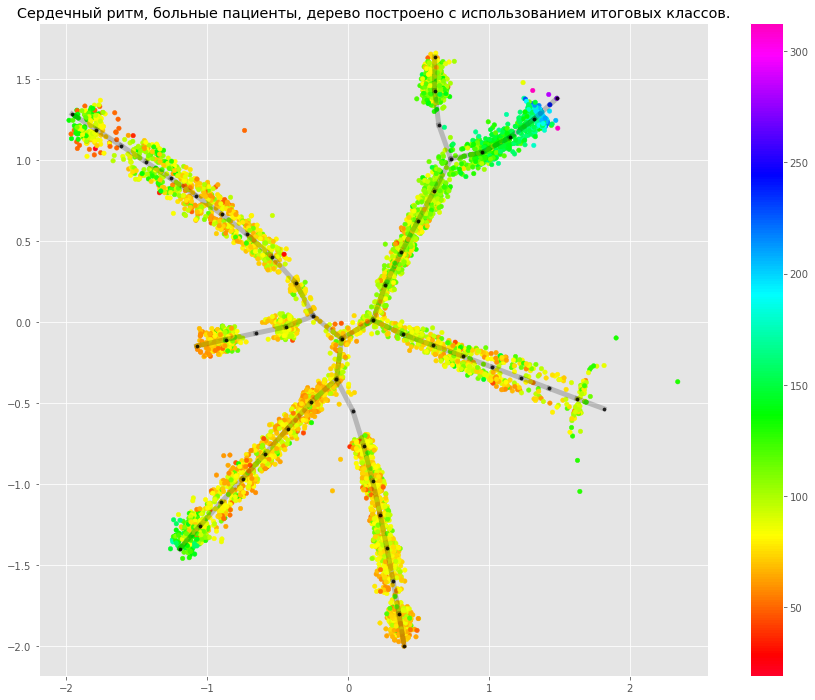

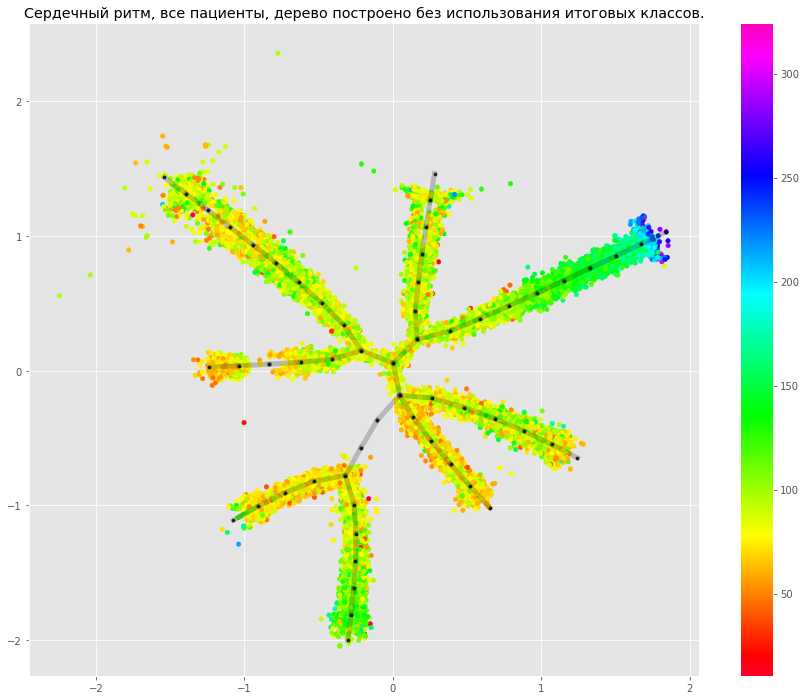

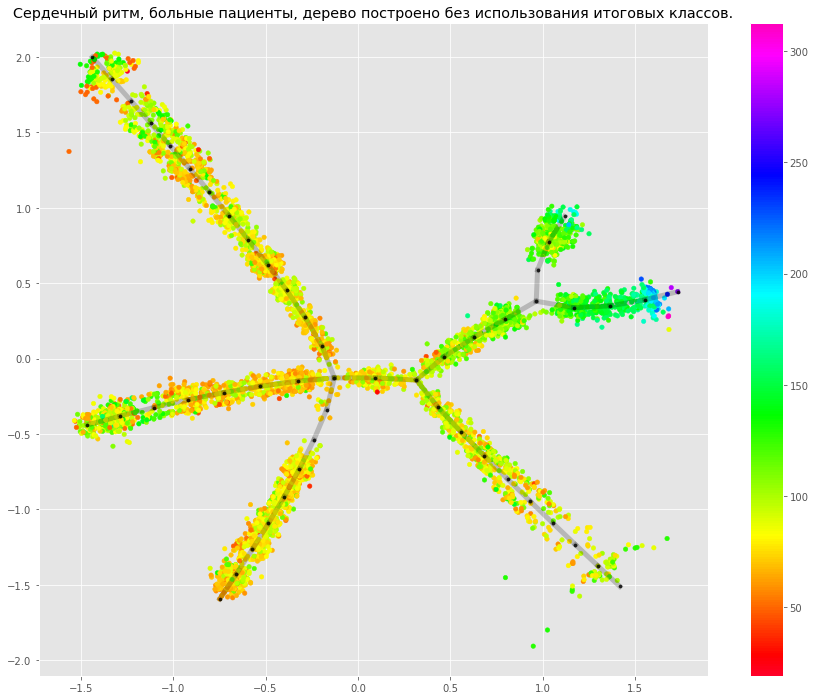

In [27]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(Chinese_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='Heart_rate', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Сердечный ритм, " + data_name)
    plt.show()

In [36]:
import skdim
import numpy as np

for X in X_norm:
    danco = skdim.id.DANCo().fit(X)
    #estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
    lpca = skdim.id.lPCA().fit_pw(X,
                                  n_neighbors = 100,
                                  n_jobs = 1)

    #get estimated intrinsic dimension
    print(danco.dimension_, np.mean(lpca.dimension_pw_))

9.046192112976286 8.964166666666667
9.004437072564171 9.580194852406573
9.0 8.736375
7.690116639687 8.705540206485386


In [39]:
def do_PCA(X, dim):
    #reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:, 0:dim], v, mean_val 

pack_9 = [do_PCA(X, 9) for X in X_norm]

X_pca_norm_9 = [pack_9[i][0] for i in range(len(pack_9))]
components_norm_9 = [pack_9[i][1] for i in range(len(pack_9))]
mnval_norm_9 = [pack_9[i][2] for i in range(len(pack_9))]

In [68]:
Chinese_tree_norm_9 = [create_extended_tree(X, 50) for X in X_pca_norm_9]

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
9 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  24000  points and  9  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2|5||50	6.3021	50	49	32	5	0	0	5.5102	5.4967	0.5281	0.5293	0.7682	0.0237	1.186	59.3008	0


160.6707  seconds elapsed
Removed 3 vertices and 3 edges
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 /

In [69]:

save_obj(Chinese_tree_norm_9, "Chinese_tree_norm_9")


In [70]:
Chinese_tree_norm_9 = load_obj("Chinese_tree_norm_9")

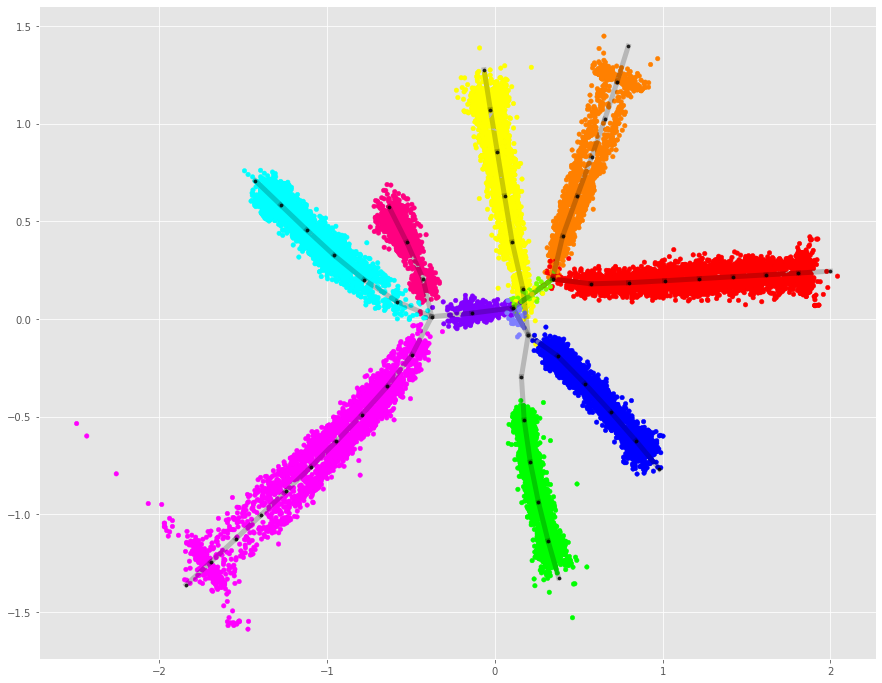

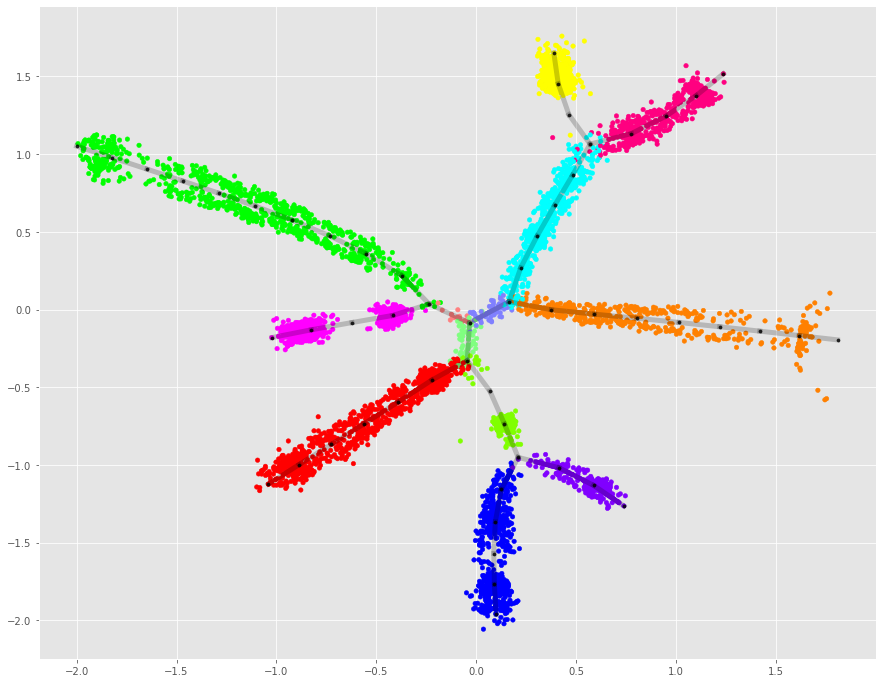

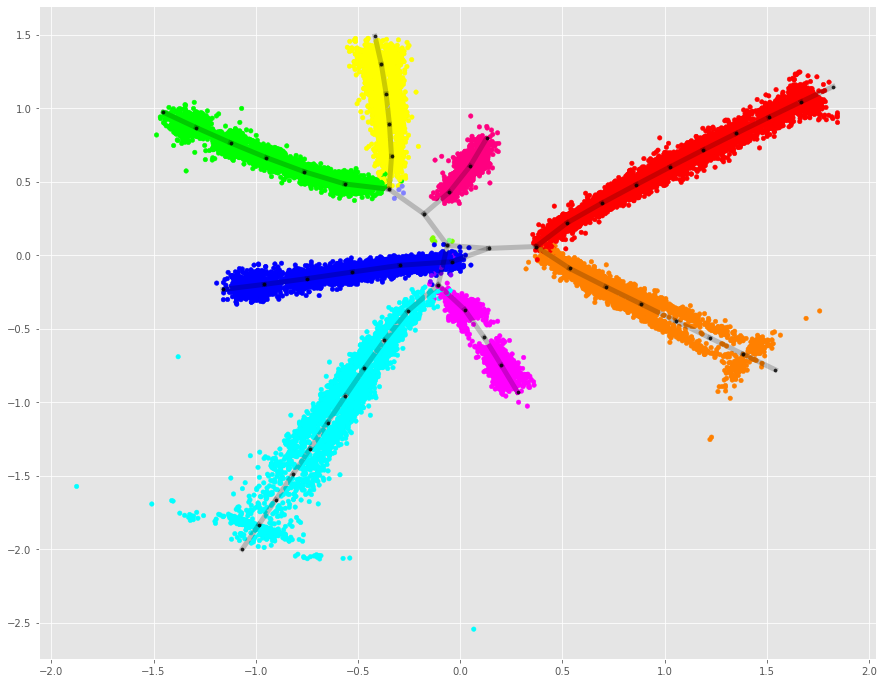

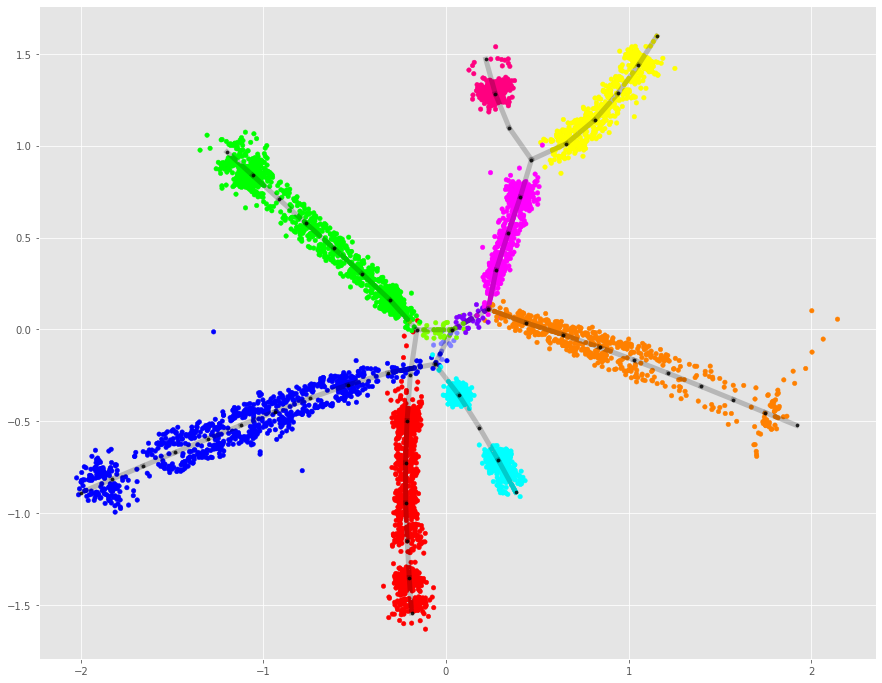

In [71]:
for tree, X_pca, data_orig, components, mnval in zip(Chinese_tree_norm_9, X_pca_norm_9, 
                                                     datasets_orig, components_norm_9, mnval_norm_9):
    fig = plt.figure(figsize=figsize)
    tree_visualization(tree, X_pca, data_orig, components, mnval)
    plt.show()

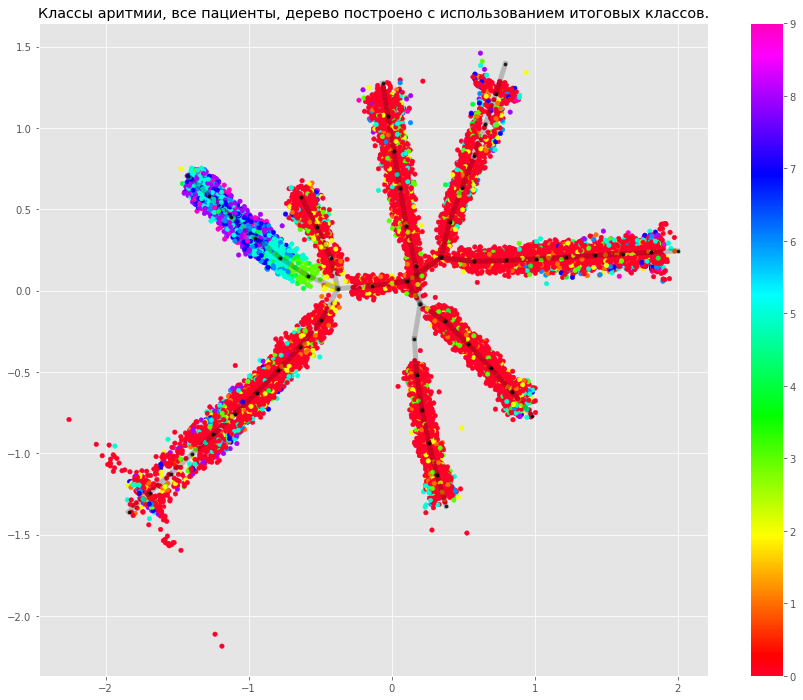

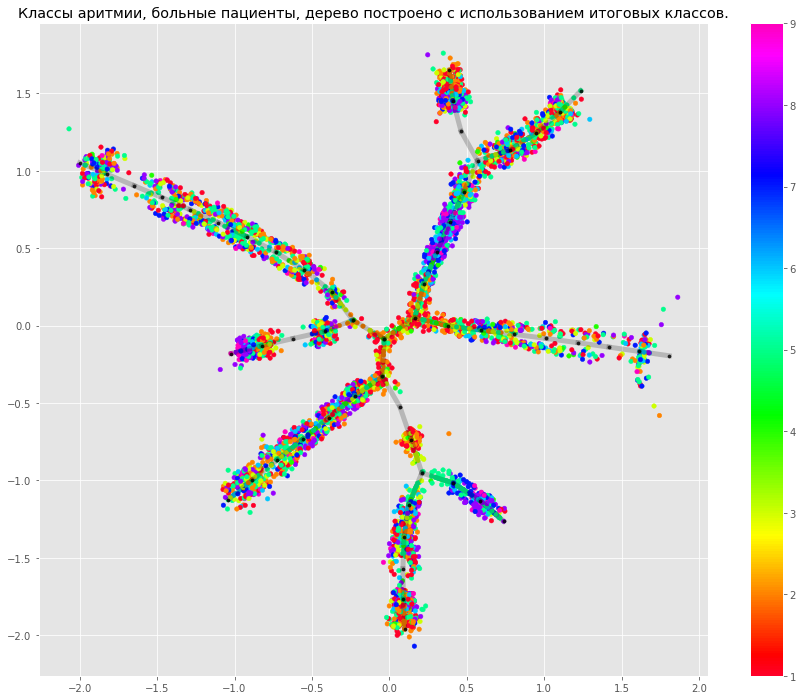

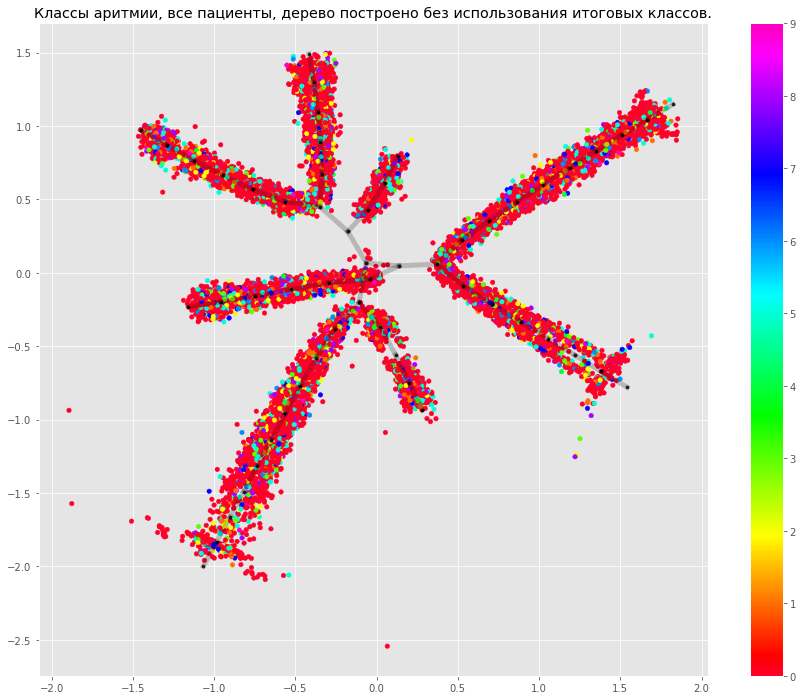

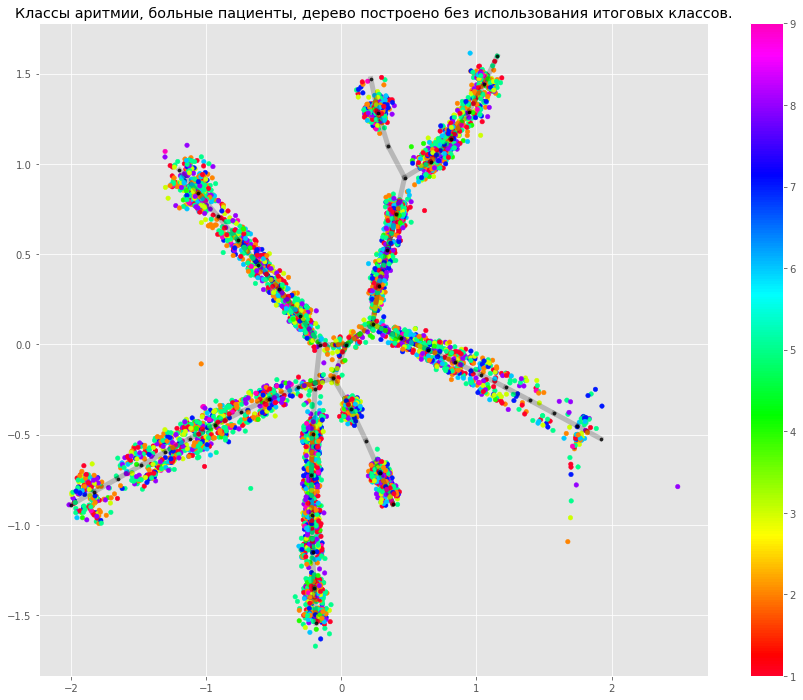

In [72]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(Chinese_tree_norm_9, X_pca_norm_9, 
                                                     datasets_orig, components_norm_9, mnval_norm_9, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='f_label', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Классы аритмии, " + data_name)
    plt.show()

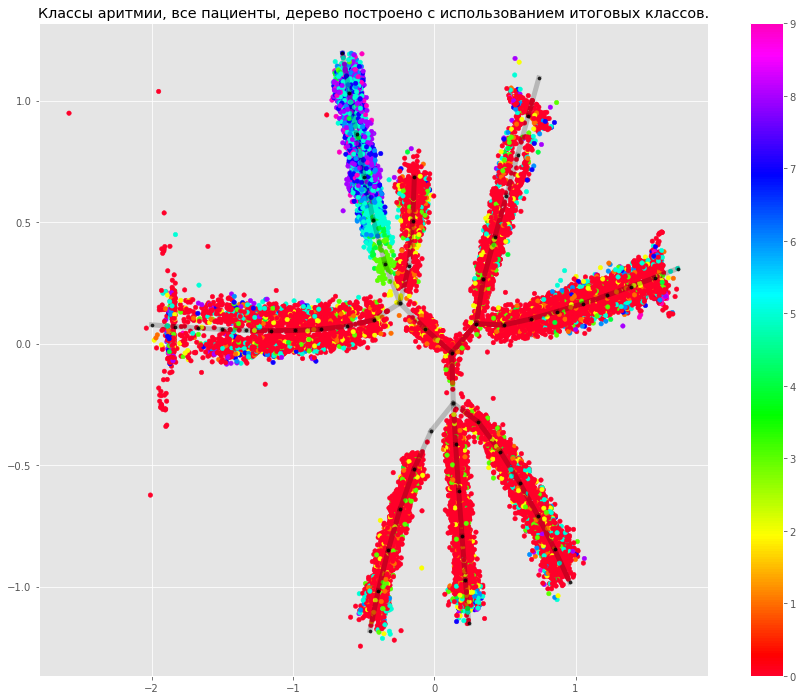

In [65]:

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(Chinese_tree_norm_9, X_pca_norm_9[0], datasets_orig[0], components_norm_9[0], mnval_norm_9[0], 
                           'k', variable_names[0],
                           Color_by_feature='f_label', cmap='gist_rainbow', add_color_bar=True)
plt.title("Классы аритмии, " + data_names[0])
plt.show()